<h1 style="margin-left: 20px; color:blue">1. Importing the required libraries</h1>

In [1]:
import pandas as pd
import requests
from io import BytesIO
from zipfile import ZipFile
from ydata_profiling import ProfileReport
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from IPython.display import display, HTML
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, make_scorer
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\dask\dataframe\_pyarrow_compat.py:21: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


<h1 style="margin-left: 20px; color:blue">2. Loading the data into the data frame</h1>

In [3]:
def get_auction_verification_data() -> pd.DataFrame:
    """
    Downloads the Auction Verification data from the UCI Machine Learning Repository,
    extracts the ZIP file, and reads the CSV file into a pandas DataFrame.

    Returns:
        pd.DataFrame: A DataFrame containing the Auction Verification data.
    """
    url = 'https://archive.ics.uci.edu/static/public/713/auction+verification.zip'
    response = requests.get(url)
    
    with ZipFile(BytesIO(response.content)) as z:
        # List all files in the zip archive
        file_list = z.namelist()
        
        # Assuming there's only one CSV file in the zip archive
        csv_file = file_list[0]
        
        # Read the CSV file into a pandas DataFrame
        with z.open(csv_file) as f:
            df = pd.read_csv(f)
    
    return df

In [5]:
df = get_auction_verification_data()
df

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667
...,...,...,...,...,...,...,...,...,...
2038,2,3,2,1,90,5,0,True,82.425000
2039,2,3,2,1,90,5,1,True,1316.983333
2040,2,3,2,1,90,5,2,False,9365.450000
2041,2,3,2,1,90,5,3,False,8474.025000


<h1 style="margin-left: 20px; color:blue">3. Exploratory Data Analysis</h1>

In [7]:
profile = ProfileReport(df, title="Profiling Report")

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h1 style="margin-left: 20px; color:blue">4. Feature Scaling</h1>

In [31]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns='verification.result')), columns=df.drop(columns='verification.result').columns)
df_scaled

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
0,-1.224745,-2.581749,0.362256,0.837307,-1.550103,-1.248531,-0.428408,-0.691577
1,-1.224745,-2.581749,0.362256,0.837307,-1.550103,-0.694141,-0.428408,-0.687958
2,-1.224745,-2.581749,0.362256,0.837307,-1.550103,0.414639,-0.428408,-0.692390
3,-1.224745,-2.581749,0.362256,0.837307,-1.550103,1.523420,-0.428408,-0.696848
4,-1.224745,-2.581749,0.362256,0.837307,-1.425830,-1.248531,-0.428408,-0.699082
...,...,...,...,...,...,...,...,...
2038,1.224745,1.117068,0.362256,0.837307,2.302374,0.969029,-0.428408,-0.699375
2039,1.224745,1.117068,0.362256,0.837307,2.302374,0.969029,0.512708,-0.580357
2040,1.224745,1.117068,0.362256,0.837307,2.302374,0.969029,1.453824,0.195559
2041,1.224745,1.117068,0.362256,0.837307,2.302374,0.969029,2.394940,0.109621


<h1 style="margin-left: 20px; color:blue">5. Feature Engineering</h1>

In [34]:
def create_features(df: pd.DataFrame) -> pd.DataFrame:
    """
    Create new features for the Auction Verification dataset.
    
    Args:
        df (pd.DataFrame): The original DataFrame.
        
    Returns:
        pd.DataFrame: The DataFrame with new features added.
    """
    # Capacity columns
    capacity_columns = ['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity', 'process.b4.capacity']
    
    # Sum of capacities
    df['sum_capacity'] = df[capacity_columns].sum(axis=1)
    
    # Average capacity
    df['avg_capacity'] = df[capacity_columns].mean(axis=1)
    
    # Maximum capacity
    df['max_capacity'] = df[capacity_columns].max(axis=1)
    
    # Minimum capacity
    df['min_capacity'] = df[capacity_columns].min(axis=1)
    
    # Price
    df['log_price'] = np.log(np.abs(df['property.price']))
    df['price_squared'] = df['property.price'] ** 2
    
    # Product (assuming it's a categorical variable)
    df = pd.get_dummies(df, columns=['property.product'], prefix='product')
    
    # # Winner (binary encoding, assuming 'property.winner' indicates presence with 1 or 0)
    # df['winner_present'] = df['property.winner'].apply(lambda x: 1 if x else 0)
    
    # # Verification result (binary encoding, assuming 'verification.result' is categorical)
    # df['verification_result_binary'] = df['verification.result'].apply(lambda x: 1 if x == 'positive' else 0)
    
    # Verification time
    df['log_verification_time'] = np.log(np.abs(df['verification.time']))
    df['verification_time_squared'] = df['verification.time'] ** 2
    
    return df

In [36]:
df_with_features = create_features(df_scaled)

In [38]:
df_with_features

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.winner,verification.time,sum_capacity,avg_capacity,max_capacity,...,log_price,price_squared,product_-1.2485311268800103,product_-0.694140974257567,product_-0.13975082163512387,product_0.41463933098731937,product_0.9690294836097626,product_1.5234196362322059,log_verification_time,verification_time_squared
0,-1.224745,-2.581749,0.362256,0.837307,-1.550103,-0.428408,-0.691577,-2.606932,-0.651733,0.837307,...,0.438321,2.402820,True,False,False,False,False,False,-0.368781,0.478279
1,-1.224745,-2.581749,0.362256,0.837307,-1.550103,-0.428408,-0.687958,-2.606932,-0.651733,0.837307,...,0.438321,2.402820,False,True,False,False,False,False,-0.374028,0.473286
2,-1.224745,-2.581749,0.362256,0.837307,-1.550103,-0.428408,-0.692390,-2.606932,-0.651733,0.837307,...,0.438321,2.402820,False,False,False,True,False,False,-0.367607,0.479403
3,-1.224745,-2.581749,0.362256,0.837307,-1.550103,-0.428408,-0.696848,-2.606932,-0.651733,0.837307,...,0.438321,2.402820,False,False,False,False,False,True,-0.361188,0.485597
4,-1.224745,-2.581749,0.362256,0.837307,-1.425830,-0.428408,-0.699082,-2.606932,-0.651733,0.837307,...,0.354754,2.032990,True,False,False,False,False,False,-0.357987,0.488716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,1.224745,1.117068,0.362256,0.837307,2.302374,-0.428408,-0.699375,3.541376,0.885344,1.224745,...,0.833941,5.300927,False,False,False,False,True,False,-0.357568,0.489126
2039,1.224745,1.117068,0.362256,0.837307,2.302374,0.512708,-0.580357,3.541376,0.885344,1.224745,...,0.833941,5.300927,False,False,False,False,True,False,-0.544111,0.336815
2040,1.224745,1.117068,0.362256,0.837307,2.302374,1.453824,0.195559,3.541376,0.885344,1.224745,...,0.833941,5.300927,False,False,False,False,True,False,-1.631893,0.038243
2041,1.224745,1.117068,0.362256,0.837307,2.302374,2.394940,0.109621,3.541376,0.885344,1.224745,...,0.833941,5.300927,False,False,False,False,True,False,-2.210728,0.012017


In [40]:
df_with_features.describe(include='all')

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.winner,verification.time,sum_capacity,avg_capacity,max_capacity,...,log_price,price_squared,product_-1.2485311268800103,product_-0.694140974257567,product_-0.13975082163512387,product_0.41463933098731937,product_0.9690294836097626,product_1.5234196362322059,log_verification_time,verification_time_squared
count,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2.043000e+03,2043.000000,...,2043.000000,2043.000000,2043,2043,2043,2043,2043,2043,2043.000000,2.043000e+03
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2,2,2,2,2,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,False,False,False,False,False,False,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1595,1586,1803,1755,1793,1683,NaN,NaN
mean,-5.564701e-17,1.669410e-16,-5.564701e-17,-1.304227e-16,5.564701e-16,-6.955876e-18,1.112940e-16,1.112940e-16,2.782350e-17,0.947272,...,-0.512442,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.505634,1.000000e+00
std,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,1.000245e+00,2.145394e+00,5.363485e-01,0.325564,...,0.923089,1.191712,NaN,NaN,NaN,NaN,NaN,NaN,0.890999,1.747107e+00
min,-1.224745e+00,-2.581749e+00,-2.760481e+00,-1.194306e+00,-1.550103e+00,-4.284082e-01,-6.998101e-01,-5.295402e+00,-1.323850e+00,-0.115871,...,-2.833247,0.003460,NaN,NaN,NaN,NaN,NaN,NaN,-9.954344,2.258220e-09
25%,-1.224745e+00,-1.348810e+00,3.622558e-01,-1.194306e+00,-8.044623e-01,-4.284082e-01,-6.546053e-01,-1.373993e+00,-3.434982e-01,0.837307,...,-1.179708,0.094475,NaN,NaN,NaN,NaN,NaN,NaN,-0.563436,3.240451e-01
50%,0.000000e+00,-1.158709e-01,3.622558e-01,8.373067e-01,-1.830950e-01,-4.284082e-01,-5.803573e-01,2.768241e-01,6.920603e-02,1.117068,...,-0.217581,0.647160,NaN,NaN,NaN,NaN,NaN,NaN,-0.432742,4.208478e-01
75%,1.224745e+00,1.117068e+00,3.622558e-01,8.373067e-01,8.110927e-01,-4.284082e-01,3.412459e-01,1.509763e+00,3.774408e-01,1.224745,...,0.163209,1.385995,NaN,NaN,NaN,NaN,NaN,NaN,-0.361433,4.853592e-01


<h1 style="margin-left: 20px; color:blue">6. Prepare Data for Machine Learning </h1>

In [43]:
X = df_with_features
y = df['verification.result']

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

<h1 style="margin-left: 20px; color:blue">7. Now using an Automated Machine Learning tool, TPOT, to select the best model</h1>

In [48]:
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# Model training
tpot.fit(X_train, y_train)

# Model evaluation
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9986013986013986

Generation 2 - Current best internal CV score: 0.9986013986013986

Generation 3 - Current best internal CV score: 0.9986013986013986

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: GradientBoostingClassifier(input_matrix, learning_rate=0.5, max_depth=3, max_features=1.0, min_samples_leaf=8, min_samples_split=20, n_estimators=100, subsample=0.3)
0.9869706840390879


In [27]:
evaluated_models = tpot.evaluated_individuals_

# Create a list of models and their metrics
model_scores = []

for model, metrics in evaluated_models.items():
    model_scores.append({'Model': model, 'Score': metrics['internal_cv_score']})

# Convert a list to a DataFrame
tpot_best_model = pd.DataFrame(model_scores)

from IPython.display import display, HTML

display(
    HTML(
        tpot_best_model.sort_values(by='Score', ascending=False)[:5].to_html()
    )
)

,Model,Score
109,"GradientBoostingClassifier(MinMaxScaler(input_matrix), GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=1.0, GradientBoostingClassifier__min_samples_leaf=8, GradientBoostingClassifier__min_samples_split=20, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.3)",1.0
84,"GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=1.0, GradientBoostingClassifier__min_samples_leaf=8, GradientBoostingClassifier__min_samples_split=20, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.3)",1.0
105,"GradientBoostingClassifier(MaxAbsScaler(input_matrix), GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=3, GradientBoostingClassifier__max_features=1.0, GradientBoostingClassifier__min_samples_leaf=8, GradientBoostingClassifier__min_samples_split=20, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.3)",1.0
100,"GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.1, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=15, GradientBoostingClassifier__min_samples_split=17, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.9500000000000001)",1.0
96,"GradientBoostingClassifier(input_matrix, GradientBoostingClassifier__learning_rate=0.5, GradientBoostingClassifier__max_depth=5, GradientBoostingClassifier__max_features=0.5, GradientBoostingClassifier__min_samples_leaf=9, GradientBoostingClassifier__min_samples_split=17, GradientBoostingClassifier__n_estimators=100, GradientBoostingClassifier__subsample=0.9500000000000001)",1.0


<h3 style="margin-left: 200px; color:lime">7.1 Repeat build best model</h3>

Final score on test data: 0.9869706840390879
Accuracy: 0.9935
Precision: 0.9750
Recall: 0.9750
F1-score: 0.9750
ROC-AUC: 0.9996


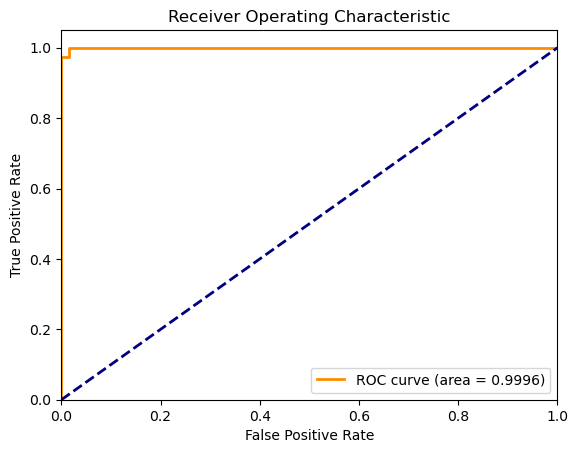

In [29]:
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
import numpy as np


# Creating a pipeline
pipeline = make_pipeline(
    MinMaxScaler(),
    GradientBoostingClassifier(
        learning_rate=0.5,
        max_depth=3,
        max_features=1.0,
        min_samples_leaf=8,
        min_samples_split=20,
        n_estimators=100,
        subsample=0.3,
        random_state=42
    )
)

# Model training
pipeline.fit(X_train, y_train)

# Model evaluation
print("Final score on test data:", pipeline.score(X_test, y_test))

# Probability predictions
y_pred_proba = pipeline.predict_proba(X_valid)[:, 1]

# Rounded predictions for classification metrics
y_pred = np.round(y_pred_proba)

# Calculate metrics
accuracy = accuracy_score(y_valid, y_pred)
precision = precision_score(y_valid, y_pred)
recall = recall_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
roc_auc = roc_auc_score(y_valid, y_pred_proba)

# Output metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_valid, y_pred_proba)
roc_auc_value = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
# plt.show()

<h1 style="margin-left: 20px; color:blue">8. Build LightGBM Model</h1>

In [31]:
import lightgbm as lgb

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\dask\dataframe\_pyarrow_compat.py:21: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


<h3 style="margin-left: 200px; color:lime">6.1 Build a LightGBM model without specifying any hyperparameters</h3>

In [33]:
import numpy as np
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Model creation and training
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
lgb_model = lgb.LGBMClassifier(boosting_type='gbdt', objective='binary', metric='binary_logloss', verbose=0)
gbm = lgb_model.fit(X_train, y_train)

# Predictions
y_pred = gbm.predict(X_test)

# Model evaluation
accuracy = accuracy_score(y_test, np.round(y_pred))
precision = precision_score(y_test, np.round(y_pred))
recall = recall_score(y_test, np.round(y_pred))
f1 = f1_score(y_test, np.round(y_pred))
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

<h3 style="margin-left: 200px; color:lime">8.2 Building a LightGBM model with hyperparameter tuning</h3>

In [35]:
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Defining parameters for Grid Search
grid_params = {
    'num_leaves': [16, 17, 18, 19, 20],
    'learning_rate': [0.2, 0.3, 0.4, 0.5],
    'bagging_fraction': [0.1, 0.2, 0.3, 0.4, 0.5],
    'feature_fraction': [0.7, 0.8, 0.9, 1],
    # 'max_depth': [-1, 5, 10],
    # 'min_child_samples': [20, 50, 100],
    'bagging_freq': [0.5, 0.6, 0.7, 0.8, 0.9, 1,5],
    # 'lambda_l1': [0, 1, 5],
    # 'lambda_l2': [0, 1, 5],
    'boosting_type': ['gbdt'],    #['gbdt', 'dart', 'goss'],
    'objective': ['binary'],      #['binary', 'binary_logloss'],
    'metric': ['accuracy']             #['binary_logloss', 'auc', 'accuracy']
}

# Create a LightGBM model
lgb_model = lgb.LGBMClassifier(verbose=0)

# Defining a metric to evaluate
scorer = make_scorer(roc_auc_score, greater_is_better=True)

# Finding the best parameters using Grid Search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=grid_params, scoring=scorer, cv=5, verbose=0, n_jobs=-1)
grid_result = grid_search.fit(X_train, y_train)

# Output the best parameters and results
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy score: {:.4f}".format(grid_result.best_score_))

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
10000 fits failed out of a total of 14000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2000 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\lightgbm\sklearn.py", line 1268, in fit
    super().fit(
  File "C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\lightgbm\sklearn.py", line 954, in fit
    self._Booster = train(
 

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] bagging_fraction is set=0.3, subsample=1.0 will be ignored. Current value: bagging_fraction=0.3
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

C:\Users\Admin\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.98648649 0.99189189 0.98918919]
  warnings.warn(


<h3 style="margin-left: 200px; color:red">Use hyperparameter tuning</h3>

In [37]:
params = {'bagging_fraction': 0.3, 'bagging_freq': 1, 'boosting_type': 'gbdt', 'feature_fraction': 0.9, 'learning_rate': 0.3, 'metric': 'accuracy', 
 'num_leaves': 17, 'objective': 'binary'} # Best accuracy score: 1.0000
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                )

[LightGBM] [Info] Number of positive: 183, number of negative: 1247
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000420 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 960
[LightGBM] [Info] Number of data points in the train set: 1430, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.127972 -> initscore=-1.919010
[LightGBM] [Info] Start training from score -1.919010
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Accuracy: 0.9870
Precision: 0.9070
Recall: 1.0000
F1-score: 0.9512
ROC-AUC: 0.9992


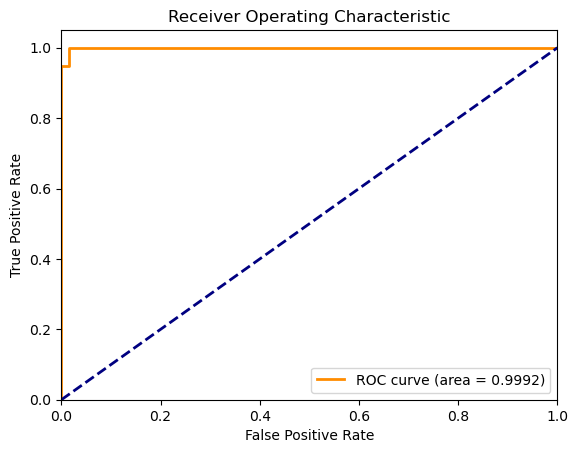

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_pred_proba = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# Model evaluation
accuracy = accuracy_score(y_test, np.round(y_pred_proba))
precision = precision_score(y_test, np.round(y_pred_proba))
recall = recall_score(y_test, np.round(y_pred_proba))
f1 = f1_score(y_test, np.round(y_pred_proba))
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Plotting the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<h1 style="margin-left: 20px; color:blue">9. Build a stacking model</h1>

Accuracy: 0.9870
Precision: 0.9070
Recall: 1.0000
F1-score: 0.9512
ROC-AUC: 0.9945


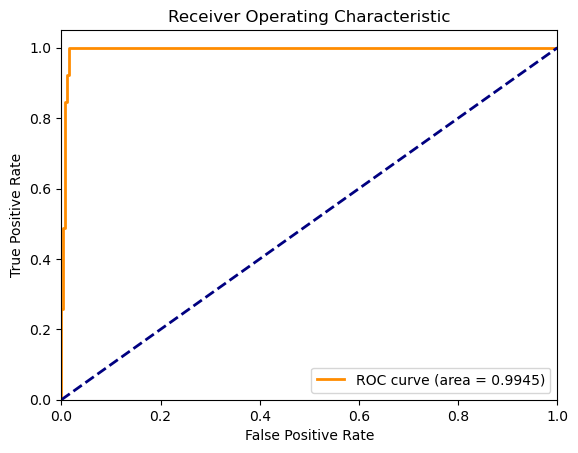

In [41]:
import numpy as np
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Training basic models

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
svc_model = SVC(probability=True, random_state=42)


rf_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

# Getting base model predictions
lgb_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
rf_pred = rf_model.predict_proba(X_test)[:, 1]
svc_pred = svc_model.predict_proba(X_test)[:, 1]

# Creating meta-features
meta_features = np.column_stack((lgb_pred, rf_pred, svc_pred))

# Training a meta-classifier
meta_model = LogisticRegression(random_state=42)
meta_model.fit(meta_features, y_test)

# Meta classifier predictions
meta_pred = meta_model.predict(meta_features)
meta_pred_proba = meta_model.predict_proba(meta_features)[:, 1]

# Model evaluation
accuracy = accuracy_score(y_test, meta_pred)
precision = precision_score(y_test, meta_pred)
recall = recall_score(y_test, meta_pred)
f1 = f1_score(y_test, meta_pred)
roc_auc = roc_auc_score(y_test, meta_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Building a ROC curve
fpr, tpr, _ = roc_curve(y_test, meta_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.9837
Precision: 0.8864
Recall: 1.0000
F1-score: 0.9398
ROC-AUC: 0.9970


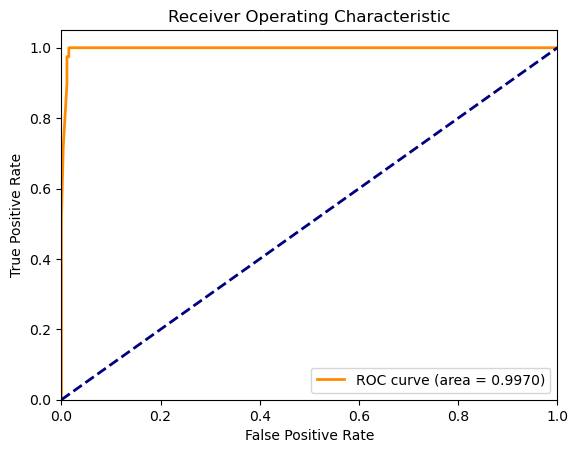

In [43]:
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Creating and training a begging model
base_model = DecisionTreeClassifier(random_state=42)
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)
bagging_model.fit(X_train, y_train)

# Predictions
y_pred = bagging_model.predict(X_test)
y_pred_proba = bagging_model.predict_proba(X_test)[:, 1]

# Model evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')
print(f'ROC-AUC: {roc_auc:.4f}')

# Building a ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
